In [2]:
import pandas as pd

In [6]:
dataset=pd.read_csv(r"C:\Users\HP PC\Downloads\Housing.csv")

In [7]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
#setting the output label
Y=dataset.price
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [9]:
#setting the input label
X=df.drop("price",axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
#optional(no n_a values in dataset,but if there are using forward fill for application purposes)
X=X.fillna(method="ffill")

C:\Users\HP PC\AppData\Local\Temp\ipykernel_1716\1485484926.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X=X.fillna(method="ffill")


In [11]:
#pre-processing the data to make it suitable for model
binary_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
X[binary_columns] = X[binary_columns].applymap(lambda x: 1 if x == "yes" else 0)
#one hot encoding
X = pd.get_dummies(X, columns=["furnishingstatus"])
X=X.astype(int)
X

C:\Users\HP PC\AppData\Local\Temp\ipykernel_1716\3131442083.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X[binary_columns] = X[binary_columns].applymap(lambda x: 1 if x == "yes" else 0)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [15]:
print(f"The shape of input is {X.shape} and shape of output is {Y.shape}")


The shape of input is (545, 14) and shape of output is (545,)


In [16]:
#splitting data into train and test set(test set not seperately available for this problem)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [17]:
print(f"The shape of training set is {x_train.shape}")

The shape of training set is (436, 14)


In [18]:
#using z-score normalization to make grad-descent faster
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
x_train

array([[ 2.66092267,  0.01582572, -0.58160647, ..., -0.61269431,
         1.20392616, -0.6841151 ],
       [ 1.39744771,  0.01582572, -0.58160647, ...,  1.63213527,
        -0.83061572, -0.6841151 ],
       [ 0.65843405,  0.01582572,  1.38413322, ..., -0.61269431,
        -0.83061572,  1.46174233],
       ...,
       [-0.11395442,  0.01582572, -0.58160647, ..., -0.61269431,
        -0.83061572,  1.46174233],
       [ 0.61075575,  0.01582572, -0.58160647, ..., -0.61269431,
         1.20392616, -0.6841151 ],
       [-0.88443575, -1.36417681, -0.58160647, ..., -0.61269431,
        -0.83061572,  1.46174233]])

In [21]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import numpy as np

In [26]:
#training a basic sequential data
my_model=Sequential([
    Dense(256,input_shape=(14,),activation="relu"),
    Dense(128,activation="relu"),
                     
                     Dense(64,activation="relu"),
                     Dense(32,activation="relu"),
                     Dense(16,activation="relu"),
                     Dense(1,activation="linear")])
my_model.compile(loss=tf.keras.losses.MeanSquaredError(), 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
my_model.summary()


                     

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,617 (186.00 KB)

 Trainable params: 47,617 (186.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
my_model.fit(x_train,y_train,epochs=200,batch_size=10,validation_split=0.2)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 25555439190016.0000 - root_mean_squared_error: 5051622.0000 - val_loss: 23883795136512.0000 - val_root_mean_squared_error: 4887105.0000
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27833818677248.0000 - root_mean_squared_error: 5274999.0000 - val_loss: 23875966468096.0000 - val_root_mean_squared_error: 4886304.0000
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25970744492032.0000 - root_mean_squared_error: 5092423.0000 - val_loss: 23783161200640.0000 - val_root_mean_squared_error: 4876798.0000
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27029227438080.0000 - root_mean_squared_error: 5196829.0000 - val_loss: 23177883287552.0000 - val_root_mean_squared_error: 4814341.5000
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26495605014528.0000 - root_mean_squared_error: 5144015.0000 - val_loss: 20618384769024.0000 - val_root_mean_squared_error: 4540747.0000
Epoch 6/200
35/35 ━━━━━

In [28]:
predictions1=my_model.predict(x_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [29]:
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions1})

In [30]:
comparison_df

,Actual,Predicted
0,2100000,3042429.50
1,11410000,7762556.50
2,4550000,3550206.75
3,4095000,4395139.00
4,4060000,4833764.50
...,...,...
104,3360000,3095892.75
105,4193000,6398357.00
106,6405000,6682321.00
107,4550000,4912441.00


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions1)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 1056075963612.5183


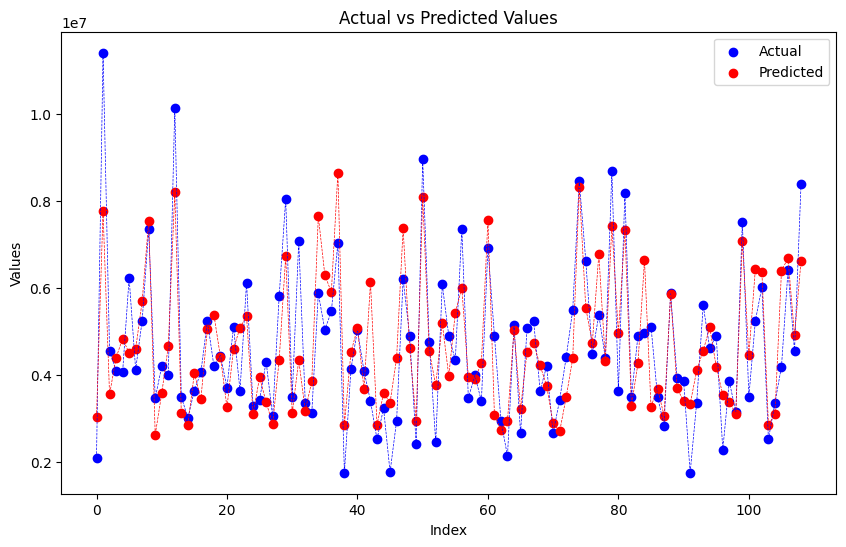

In [35]:
import matplotlib.pyplot as plt


# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(comparison_df.index, comparison_df['Actual'], color='blue', label='Actual')
plt.scatter(comparison_df.index, comparison_df['Predicted'], color='red', label='Predicted')

# Optional: Connect the points with a line for better visualization
plt.plot(comparison_df.index, comparison_df['Actual'], color='blue', linewidth=0.5, linestyle='--')
plt.plot(comparison_df.index, comparison_df['Predicted'], color='red', linewidth=0.5, linestyle='--')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [36]:
#implementing a simple Regressor Model

from sklearn.linear_model import SGDRegressor
model=SGDRegressor()

In [37]:
model.fit(x_train,y_train)

SGDRegressor()

In [38]:
help1=model.predict(x_test).flatten()

In [39]:
comparison_df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': help1})

In [40]:
comparison_df1

,Actual,Predicted
0,2100000,2.796018e+06
1,11410000,6.665814e+06
2,4550000,3.680158e+06
3,4095000,4.492365e+06
4,4060000,5.022515e+06
...,...,...
104,3360000,3.058315e+06
105,4193000,5.350197e+06
106,6405000,6.956703e+06
107,4550000,5.268440e+06


In [41]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, help1)
print(f"Mean Squared Error: {mse1}")


Mean Squared Error: 953835099951.0747


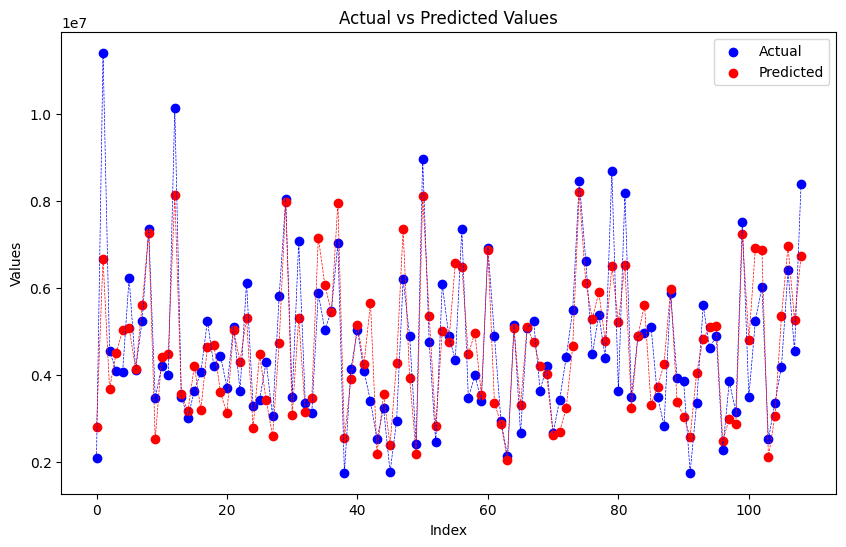

In [44]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(comparison_df1.index, comparison_df1['Actual'], color='blue', label='Actual')
plt.scatter(comparison_df1.index, comparison_df1['Predicted'], color='red', label='Predicted')

# Optional: Connect the points with a line for better visualization
plt.plot(comparison_df1.index, comparison_df1['Actual'], color='blue', linewidth=0.5, linestyle='--')
plt.plot(comparison_df1.index, comparison_df1['Predicted'], color='red', linewidth=0.5, linestyle='--')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [45]:
#The performance of simple regressor is slightly better than sequential model, and on a large scale the performance of both the models is
#pretty poor(very high MSE)

In [110]:
#using tensor flow functional API
input_layer = Input(shape=(14,))
first_dense = Dense(units=256, activation='relu')(input_layer)

second_dense = Dense(units=128, activation='relu')(first_dense)
third_dense = Dense(units=64, activation='relu')(second_dense)
fourth_dense = Dense(units=32, activation='relu')(third_dense)



y1_output = Dense(units=1, name='y1_output')(fourth_dense)

# Define the model
my_model = Model(inputs=input_layer, outputs=y1_output)

# Summary of the model
my_model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ y1_output (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 47,105 (184.00 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
optimizerr = tf.keras.optimizers.Adam()
my_model.compile(loss=tf.keras.losses.MeanSquaredError(), 
                 optimizer=optimizerr, 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history = my_model.fit(x_train, y_train,
                    epochs=500, batch_size=10, validation_split=0.2)

Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 26026042195968.0000 - root_mean_squared_error: 5100051.0000 - val_loss: 23883757387776.0000 - val_root_mean_squared_error: 4887101.0000
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26260394737664.0000 - root_mean_squared_error: 5123286.5000 - val_loss: 23877847613440.0000 - val_root_mean_squared_error: 4886496.5000
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27878741770240.0000 - root_mean_squared_error: 5279244.0000 - val_loss: 23830424715264.0000 - val_root_mean_squared_error: 4881641.5000
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27769121538048.0000 - root_mean_squared_error: 5261551.5000 - val_loss: 23608042717184.0000 - val_root_mean_squared_error: 4858811.0000
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26589272211456.0000 - root_mean_squared_error: 5154168.5000 - val_loss: 22857906126848.0000 - val_root_mean_squared_error: 4780994.5000
Epoch 6/500
35/35 ━━━━━━

In [104]:
predictions3=my_model.predict(x_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [105]:
comparison_df2 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions3})

In [106]:
comparison_df2

,Actual,Predicted
0,2100000,3025469.50
1,11410000,7872727.00
2,4550000,3523083.50
3,4095000,4405155.00
4,4060000,4885243.00
...,...,...
104,3360000,2978210.75
105,4193000,6400948.50
106,6405000,6779065.50
107,4550000,4898261.00


In [107]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, predictions3)
print(f"Mean Squared Error: {mse2}")


Mean Squared Error: 1070849972268.0321


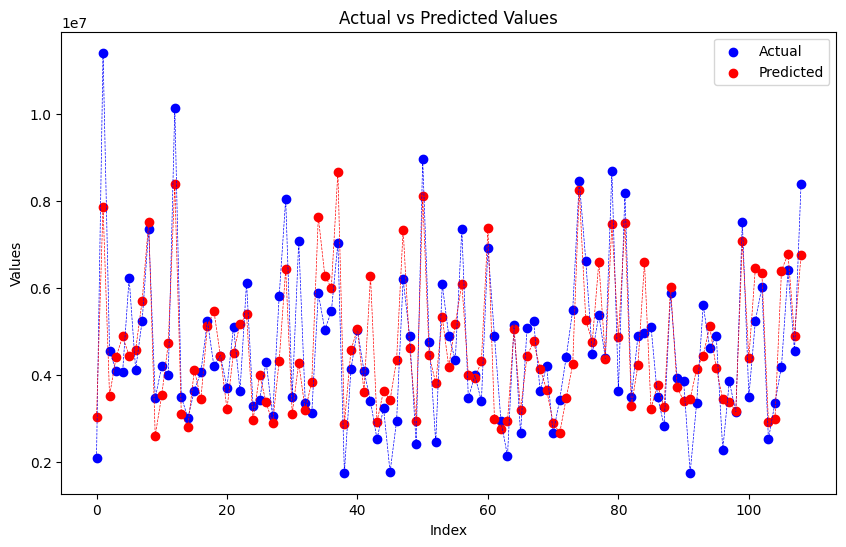

In [108]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(comparison_df2.index, comparison_df2['Actual'], color='blue', label='Actual')
plt.scatter(comparison_df2.index, comparison_df2['Predicted'], color='red', label='Predicted')

# Optional: Connect the points with a line for better visualization
plt.plot(comparison_df2.index, comparison_df2['Actual'], color='blue', linewidth=0.5, linestyle='--')
plt.plot(comparison_df2.index, comparison_df2['Predicted'], color='red', linewidth=0.5, linestyle='--')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [109]:
mse2/mse1

1.1226783039573187